In [1]:
import pandas as pd
import numpy as np


#Set seed for reproducibility
np.random.seed(42)

In [2]:
#generate daily date range
date_range=pd.date_range(start="2022-01-01",end="2022-12-31",freq='D')
n=len(date_range)

In [3]:
#Exogeneous variables
price=np.round(np.random.normal(loc=10,scale=2,size=n),2)
promotion=np.random.binomial(1,0.2,size=n)
holiday=np.random.binomial(1,0.1,size=n)
temperature=20+10*np.sin(2*np.pi*date_range.dayofyear/365) + np.random.normal(0,2,n)
temperature=np.round(temperature,2)

#Seasonality based base model
day_of_year=date_range.dayofyear.values
base_demand=100+20*np.sin(2*np.pi*day_of_year/365)

#Demand formula with noise
demand=np.round(
    base_demand
    -2*price
    +15*promotion
    -10*holiday
    +0.5*temperature
    +np.random.normal(0,5,n)).astype(int)

#Create a DataFrame
df=pd.DataFrame({
    "date": date_range,
    "demand": demand,
    "price": price,
    "promotion": promotion,
    "holiday": holiday,
    "temperature": temperature
})
    
#preview
print(df.head())


        date  demand  price  promotion  holiday  temperature
0 2022-01-01      90  10.99          0        0        19.37
1 2022-01-02     118   9.72          1        0        19.23
2 2022-01-03      89  11.30          0        0        21.27
3 2022-01-04      96  13.05          1        1        23.82
4 2022-01-05      93   9.53          0        0        20.73


In [4]:
#Add more features
df['day_of_week']=df['date'].dt.dayofweek   #Monday=0,sunday=6
df['weekend']=df['day_of_week'].isin([5,6]).astype(int)  #1 if saturday or sunday
df['month']=df['date'].dt.month
df['quarter']=df['date'].dt.quarter
df['is_month_start']=df['date'].dt.is_month_start.astype(int)
df['is_month_end']=df['date'].dt.is_month_end.astype(int)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            365 non-null    datetime64[ns]
 1   demand          365 non-null    int64         
 2   price           365 non-null    float64       
 3   promotion       365 non-null    int32         
 4   holiday         365 non-null    int32         
 5   temperature     365 non-null    float64       
 6   day_of_week     365 non-null    int32         
 7   weekend         365 non-null    int64         
 8   month           365 non-null    int32         
 9   quarter         365 non-null    int32         
 10  is_month_start  365 non-null    int64         
 11  is_month_end    365 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int32(5), int64(4)
memory usage: 27.2 KB


In [6]:
df.describe()

,date,demand,price,promotion,holiday,temperature,day_of_week,weekend,month,quarter,is_month_start,is_month_end
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,92.641096,10.019781,0.213699,0.101370,20.128603,3.005479,0.287671,6.526027,2.509589,0.032877,0.032877
min,2022-01-01 00:00:00,49.000000,3.520000,0.000000,0.000000,6.830000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2022-04-02 00:00:00,75.000000,8.690000,0.000000,0.000000,13.500000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,2022-07-02 00:00:00,93.000000,10.120000,0.000000,0.000000,19.970000,3.000000,0.000000,7.000000,3.000000,0.000000,0.000000
75%,2022-10-01 00:00:00,108.000000,11.250000,0.000000,0.000000,26.710000,5.000000,1.000000,10.000000,4.000000,0.000000,0.000000
max,2022-12-31 00:00:00,138.000000,17.710000,1.000000,1.000000,34.200000,6.000000,1.000000,12.000000,4.000000,1.000000,1.000000
std,NaN,20.495911,1.896148,0.410479,0.302232,7.430824,2.002738,0.453298,3.452584,1.118300,0.178559,0.178559


In [7]:
df.isnull().sum()

date              0
demand            0
price             0
promotion         0
holiday           0
temperature       0
day_of_week       0
weekend           0
month             0
quarter           0
is_month_start    0
is_month_end      0
dtype: int64

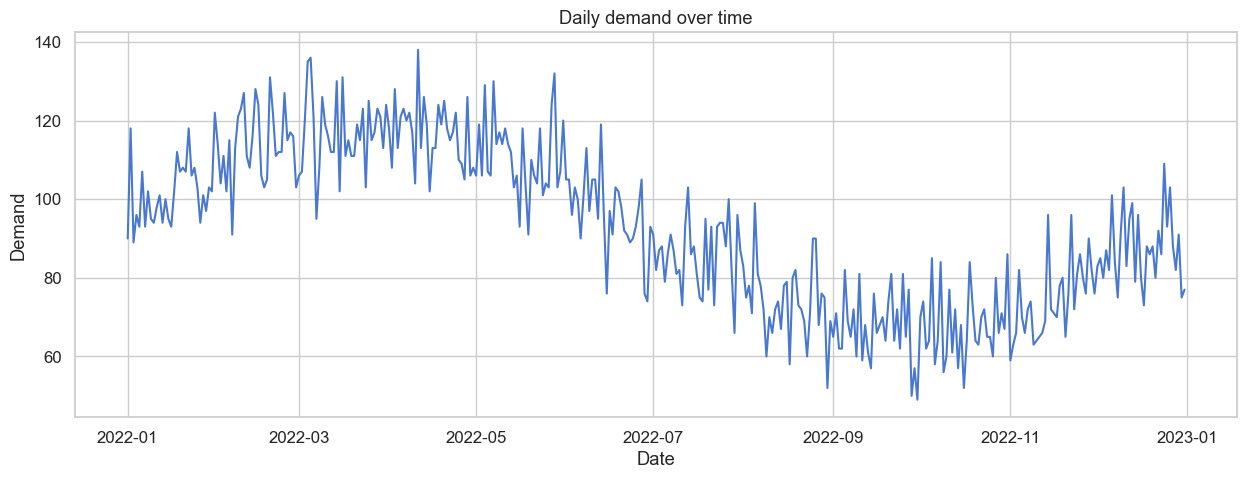

In [8]:
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#set stype
sns.set(style='whitegrid',palette='muted',font_scale=1.1)

#Plot demand over time
plt.figure(figsize=(15,5))
plt.plot(df['date'],df['demand'])
plt.title("Daily demand over time")
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

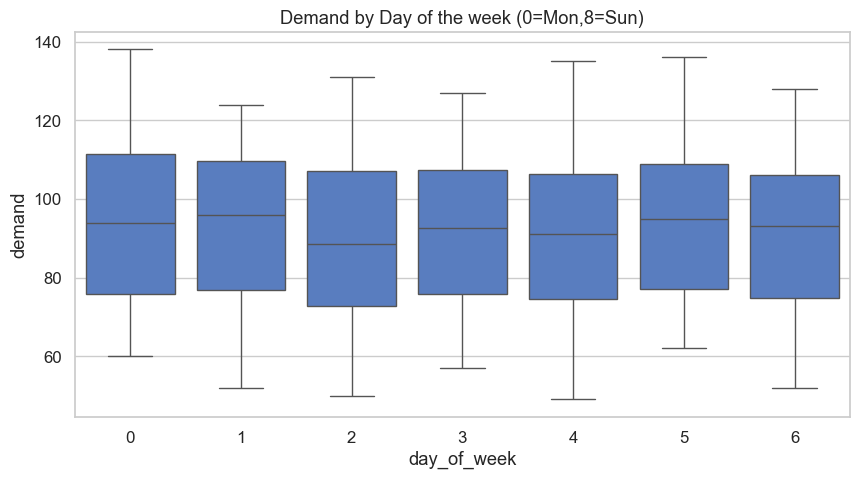

In [9]:
#Box plot of demand by day of the week
plt.figure(figsize=(10,5))
sns.boxplot(x='day_of_week',y='demand',data=df)
plt.title("Demand by Day of the week (0=Mon,8=Sun)")
plt.show()

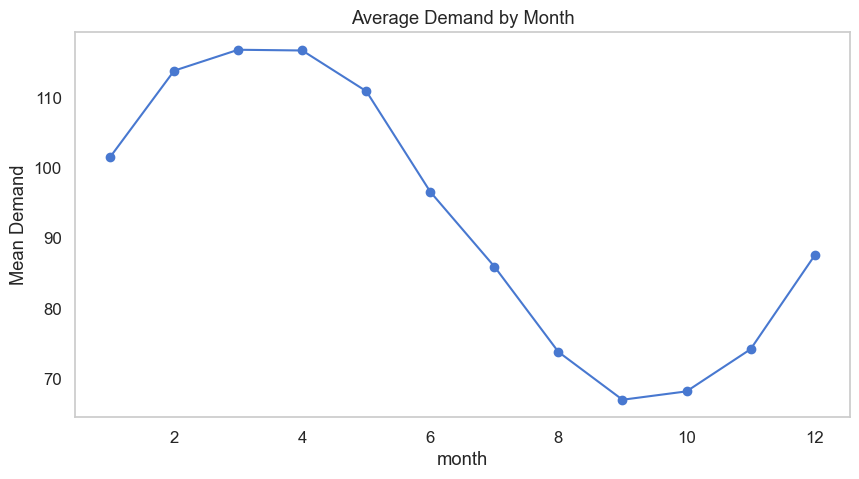

In [10]:
#Line plot:avg demand by month
plt.figure(figsize=(10,5))
df.groupby('month')['demand'].mean().plot(marker='o')
plt.title("Average Demand by Month")
plt.ylabel("Mean Demand")
plt.grid()
plt.show()

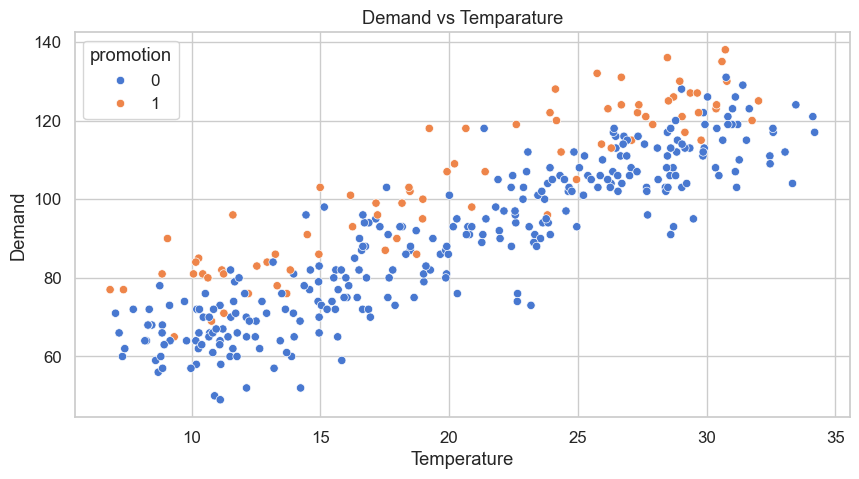

In [11]:
#Scatter plot demand vs temparature
plt.figure(figsize=((10,5)))
sns.scatterplot(x="temperature",y="demand",hue="promotion",data=df)
plt.title("Demand vs Temparature")
plt.xlabel("Temperature")
plt.ylabel("Demand")
plt.show()

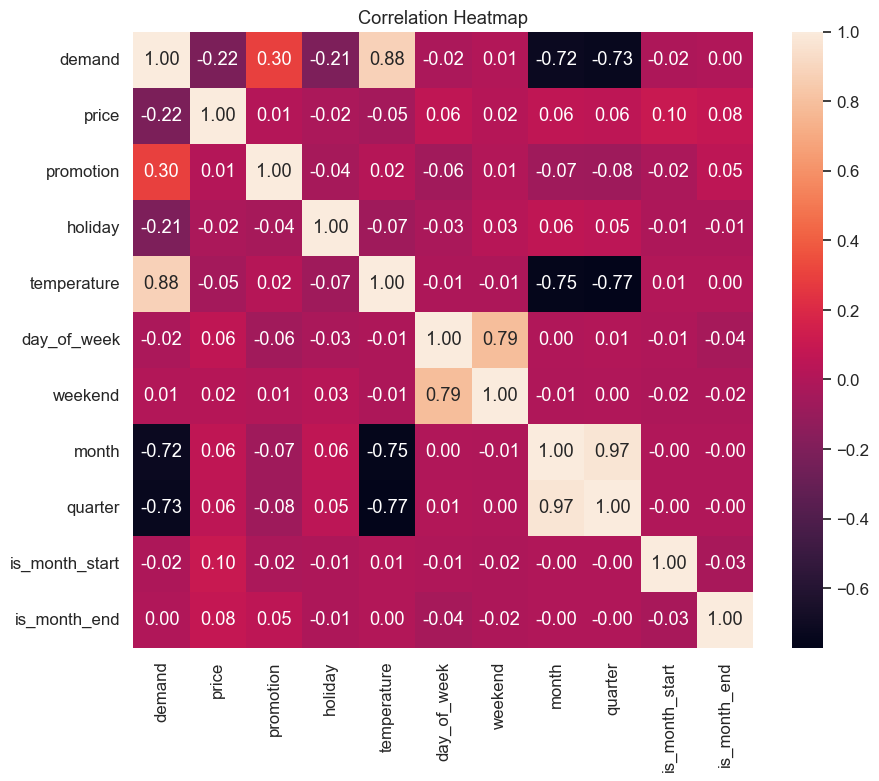

In [12]:
#correlation map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,color="blue",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
#sort by date to ensure the order
df=df.sort_values("date").reset_index(drop=True)

#lag features
df['lag_1']=df['demand'].shift(1)
df['lag_7']=df['demand'].shift(7)

#Rolling mean features
df['rolling_mean_3']=df['demand'].shift(1).rolling(window=3).mean()
df['rolling_mean_7']=df['demand'].shift(1).rolling(window=7).mean()


In [14]:
df.isnull().sum()

date              0
demand            0
price             0
promotion         0
holiday           0
temperature       0
day_of_week       0
weekend           0
month             0
quarter           0
is_month_start    0
is_month_end      0
lag_1             1
lag_7             7
rolling_mean_3    3
rolling_mean_7    7
dtype: int64

In [15]:
df=df.dropna().reset_index(drop=True)

In [16]:
df.isnull().sum()

date              0
demand            0
price             0
promotion         0
holiday           0
temperature       0
day_of_week       0
weekend           0
month             0
quarter           0
is_month_start    0
is_month_end      0
lag_1             0
lag_7             0
rolling_mean_3    0
rolling_mean_7    0
dtype: int64

In [17]:
df.head()

,date,demand,price,promotion,holiday,temperature,day_of_week,weekend,month,quarter,is_month_start,is_month_end,lag_1,lag_7,rolling_mean_3,rolling_mean_7
0,2022-01-08,102,11.53,1,0,18.48,5,1,1,1,0,0,93.0,90.0,97.666667,98.000000
1,2022-01-09,95,9.06,0,0,17.15,6,1,1,1,0,0,102.0,118.0,100.666667,99.714286
2,2022-01-10,94,11.09,0,0,22.59,0,0,1,1,0,0,95.0,89.0,96.666667,96.428571
3,2022-01-11,98,9.07,1,1,20.88,1,0,1,1,0,0,94.0,96.0,97.000000,97.142857
4,2022-01-12,101,9.07,0,0,20.01,2,0,1,1,0,0,98.0,93.0,95.666667,97.428571


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            358 non-null    datetime64[ns]
 1   demand          358 non-null    int64         
 2   price           358 non-null    float64       
 3   promotion       358 non-null    int32         
 4   holiday         358 non-null    int32         
 5   temperature     358 non-null    float64       
 6   day_of_week     358 non-null    int32         
 7   weekend         358 non-null    int64         
 8   month           358 non-null    int32         
 9   quarter         358 non-null    int32         
 10  is_month_start  358 non-null    int64         
 11  is_month_end    358 non-null    int64         
 12  lag_1           358 non-null    float64       
 13  lag_7           358 non-null    float64       
 14  rolling_mean_3  358 non-null    float64       
 15  rollin

In [19]:
#Train test split
#define the split ratio for example last 20% data for testing
split_ratio=0.8
split_index=int(len(df)*split_ratio)

#time based train test split
train_df=df.iloc[:split_index]
test_df=df.iloc[split_index:]

print("Train Data Shape:",train_df.shape)
print("Test Data Shape:", test_df.shape)

Train Data Shape: (286, 16)
Test Data Shape: (72, 16)


SARIMAX

In [20]:
#Prepare data for SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
#Ensure the date is datetime and set as index
df_sarimax=df.copy()
df_sarimax['date']=pd.to_datetime(df_sarimax['date'])
df_sarimax.set_index('date',inplace=True)

#define exogenous variables and y value
y=df_sarimax['demand']
exog_vars=["price","promotion","holiday","temperature"]
exog=df_sarimax[exog_vars]

In [22]:
#SARIMAX also needs time based splitting
split_index=int(len(df_sarimax)*0.8)
y_train,y_test= y[:split_index],y[split_index:]
exog_train,exog_test=exog[:split_index],exog[split_index:]

In [23]:
#Fit SARIMAX model
model=SARIMAX(
    y_train,
    exog=exog_train,
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False,
)

sarimax_result=model.fit(disp=False)

d:\DataScience\ProjectsPractice\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\DataScience\ProjectsPractice\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\DataScience\ProjectsPractice\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
#Make predictions
y_pred=sarimax_result.predict(
    start=y_test.index[0],
    end=y_test.index[-1],
    exog=exog_test
)

In [25]:
#Evaluate
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)

print("SARIMAX RMSE:",rmse)
print("SARIMAX MAE:", mae)

SARIMAX RMSE: 20.09320248124915
SARIMAX MAE: 17.223829702099895


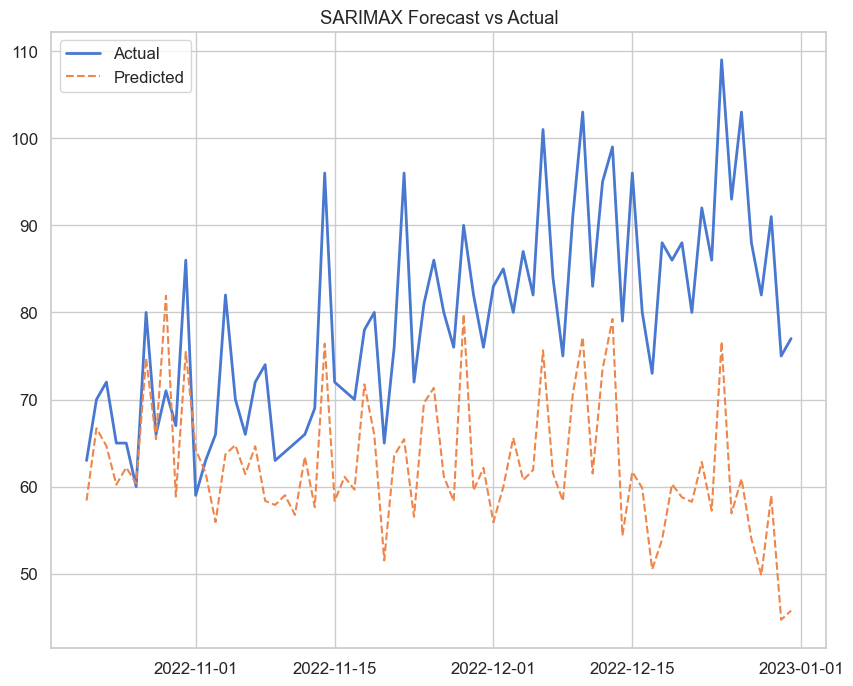

In [26]:
#Plot actual vs predict
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(y_test.index,y_test.values,label="Actual",linewidth=2)
plt.plot(y_pred.index,y_pred.values,label="Predicted",linestyle='--')
plt.legend()
plt.title("SARIMAX Forecast vs Actual")
plt.show()

XGBOOST

In [28]:
df_ml=df.dropna().copy()

In [29]:
#target
y=df_ml['demand']

X=df_ml.drop(columns=['date','demand'])

print(X.columns.to_list())

['price', 'promotion', 'holiday', 'temperature', 'day_of_week', 'weekend', 'month', 'quarter', 'is_month_start', 'is_month_end', 'lag_1', 'lag_7', 'rolling_mean_3', 'rolling_mean_7']


In [35]:
split_index=int(len(df_ml)*0.8)
X_train,X_test=X[:split_index],X[split_index:]
y_train,y_test_xg=y[:split_index],y[split_index:]

In [36]:
from xgboost import XGBRegressor

xgb_model=XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
y_pred_xg=xgb_model.predict(X_test)

rmse_xg=np.sqrt(mean_squared_error(y_test_xg,y_pred_xg))
mae_xg=mean_absolute_error(y_test_xg,y_pred_xg)

print("XGBoost RMSE:",rmse_xg)
print("XGBoost MAE:",mae_xg)

XGBoost RMSE: 7.781300985023728
XGBoost MAE: 6.115142822265625


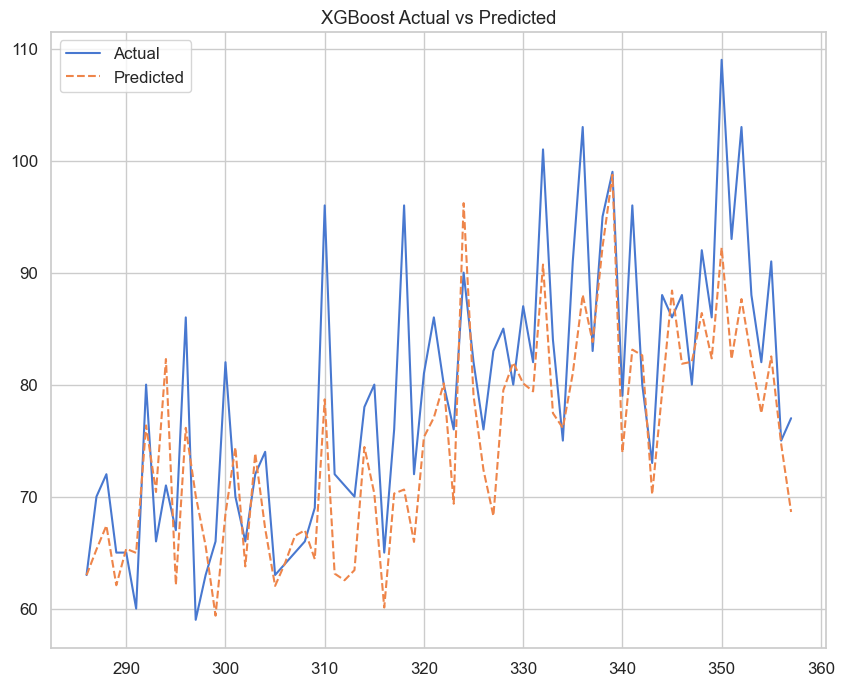

In [40]:
plt.figure(figsize=(10,8))

plt.plot(y_test_xg.index,y_test_xg.values,label='Actual')
plt.plot(y_test_xg.index,y_pred_xg,label='Predicted',linestyle='--')
plt.title("XGBoost Actual vs Predicted")
plt.legend()
plt.show()


In [42]:
#hyper parameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit

param_grid={
    'random_forest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[100,200,500],
            'max_depth':[1,3,5],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4],
        }     
    },
    'xgboost':{
        'model':XGBRegressor(),
        'params':{
            'n_estimators':[100,200,300],
            'learning_rate':[0.01,0.05,0.1],
            'max_depth':[3,4,5],
            'subsample':[0.7,0.8,1.0],
            'colsample_bytree':[0.7,0.8,1.0],
            'min_child_weight':[1,3,5],
            'gamma':[0,0.1,0.3]
        }


    }
}

In [46]:
tscv=TimeSeriesSplit(n_splits=3)
best_model={}
for name,mp in param_grid.items():
    reg=GridSearchCV(estimator=mp['model'],param_grid=mp['params'],scoring='r2',cv=tscv,n_jobs=-1,verbose=True)
    reg.fit(X_train,y_train)
    best_model[name]={
        'best_score':reg.best_score_,
        'best_params':reg.best_params_,
        'best_estimator':reg.best_estimator_
    }
print(f"Best Model: {name}")
print("Best Score:",reg.best_score_)
print("Best Params:",reg.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Model: xgboost
Best Score: -0.0036733349164326987
Best Params: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.7}


In [49]:
#model evaluation
#pick the best model
xgb_tuned=best_model['xgboost']['best_estimator']

#predict
y_pred_tuned=xgb_tuned.predict(X_test)

#Evaluate
rmse_tuned=np.sqrt(mean_squared_error(y_test,y_pred_tuned))
mae_tuned=mean_absolute_error(y_test,y_pred_tuned)

print("Tuned XGBoost RMSE:",rmse_tuned)
print("Tuned XGBoost MAE:",mae_tuned)

Tuned XGBoost RMSE: 8.01303469202436
Tuned XGBoost MAE: 6.505504131317139


In [50]:
import shap

#create explainer using TreeExplainer
explainer=shap.Explainer(xgb_tuned)

shap_values=explainer(X_test)

d:\DataScience\ProjectsPractice\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


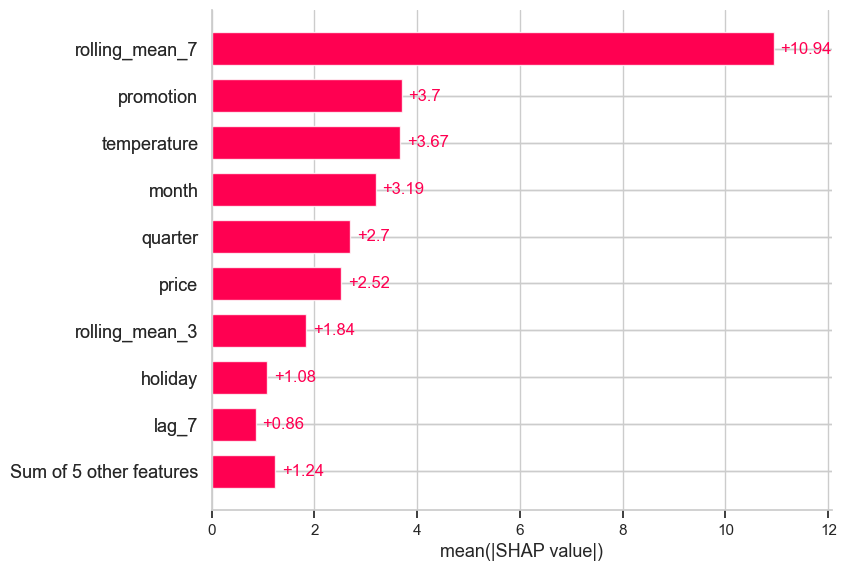

In [51]:
#Global Feature importance Top features
shap.plots.bar(shap_values)

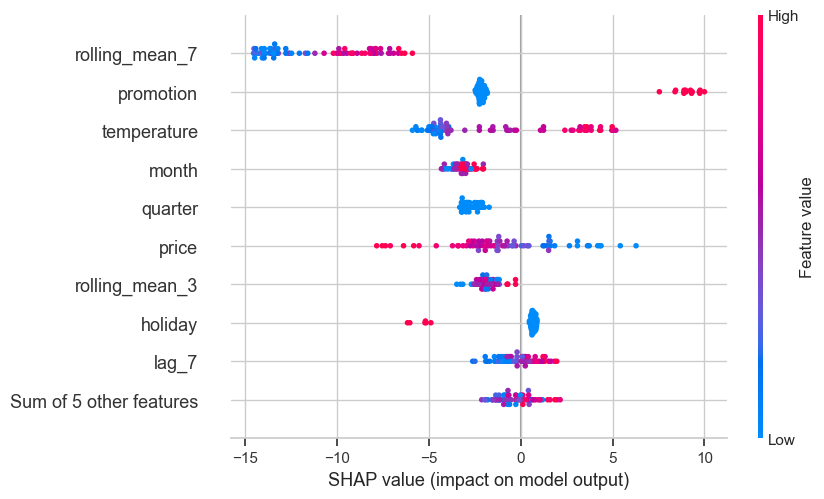

In [52]:
#distribution and direction of shap values for each feature
shap.plots.beeswarm(shap_values)

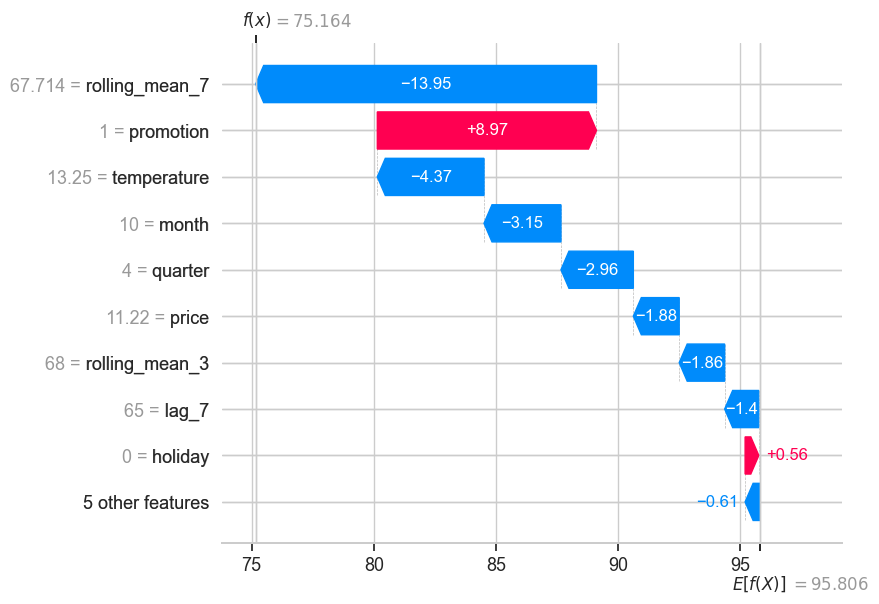

In [54]:
#local explanation single row-This explains why the model made a specific prediction (like a mini waterfall)

shap.plots.waterfall(shap_values[10])



In [55]:
#Pick the right days and generate the local shap plot
#convert dataframe to easier lookup
y_test_df=y_test.to_frame(name='demand')

#sort by demand
top_days=y_test_df.sort_values(by='demand',ascending=False).head(3)
low_days=y_test_df.sort_values(by='demand',ascending=True).head(3)

print("Top Days:",top_days)
print("Low Days:",low_days)


Top Days:      demand
350     109
336     103
352     103
Low Days:      demand
297      59
291      60
298      63


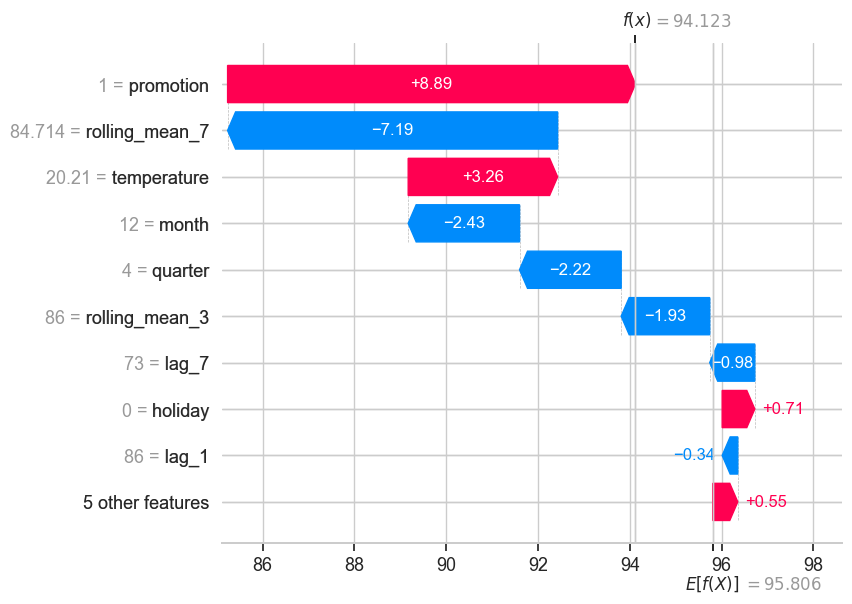

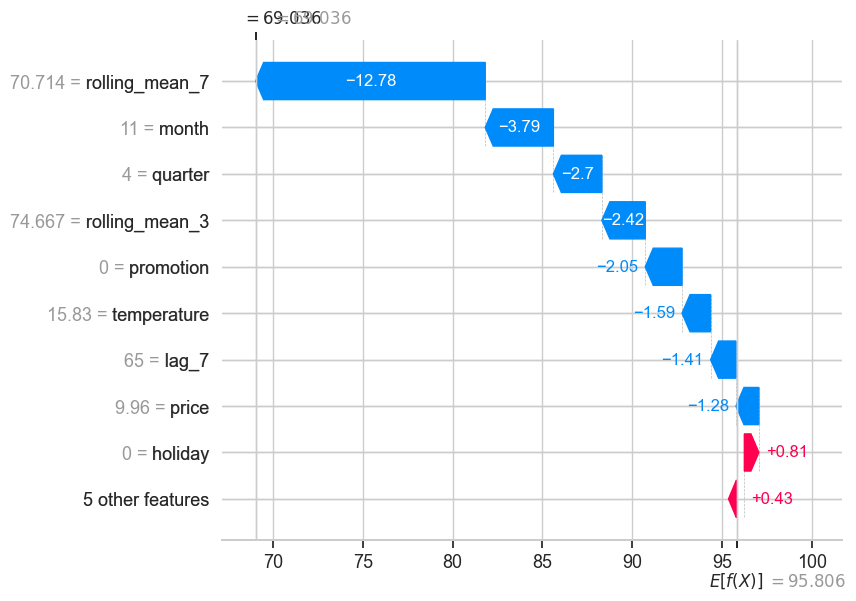

In [57]:
#get the index position and look for the index in X_test
peak_index=X_test.index.get_loc(top_days.index[0])
low_index=X_test.index.get_loc(low_days.index[0])

#Waterfall plot for peak and low days
shap.plots.waterfall(shap_values[peak_index])
shap.plots.waterfall(shap_values[low_index])

In [58]:
import joblib

#Save the best model after tuning
joblib.dump(best_model['xgboost']['best_estimator'],'xgb_model.pkl')

['xgb_model.pkl']